# Wavelet Denoising for Acoustic Data

This notebook demonstrates wavelet-based denoising techniques for underwater acoustic recordings.

## Wavelet Denoising Overview

Wavelet denoising is a powerful technique for removing noise from signals while preserving important features. It works by:

1. **Decomposing** the signal into wavelet coefficients at different scales
2. **Thresholding** the coefficients to remove noise
3. **Reconstructing** the signal from the thresholded coefficients

### The Universal Threshold (VisuShrink)

We use the VisuShrink method:
- **Threshold** = σ × √(2 × log(N))
- **σ** is estimated from the Median Absolute Deviation (MAD) of the finest-scale wavelet coefficients
- **N** is the signal length

### Key Features

- **Preserves transients**: Unlike frequency-domain filtering, wavelets preserve sharp features
- **Adaptive**: Threshold automatically adjusts to signal characteristics
- **Multi-resolution**: Denoises at multiple time scales simultaneously

In [1]:
# Import the EARS reader module with wavelet denoising capabilities
import ears_reader
import numpy as np
from pathlib import Path

%matplotlib inline

## Example 1: Basic Wavelet Denoising

In [2]:
# Read a sample file
file_path = Path('unophysics/sample_data/71621DC7.190')
data = ears_reader.read_ears_file(file_path)

ears_reader.print_file_info(data, file_path)

File: unophysics/sample_data/71621DC7.190
Recording start: 2017-06-12 06:38:38.348219
Recording end: 2017-06-12 06:38:59.681552
Duration: 21.33 seconds
Number of samples: 4,096,000
Sampling rate: 192,000 Hz


In [3]:
# Apply wavelet denoising with default parameters (Daubechies 20 wavelet)
acoustic_data = data['data']
denoised_data, threshold_used = ears_reader.wavelet_denoise(
    acoustic_data, 
    return_threshold=True
)

print(f"Automatic threshold calculated: {threshold_used:.2f}")
print(f"Original data RMS: {np.sqrt(np.mean(acoustic_data**2)):.2f}")
print(f"Denoised data RMS: {np.sqrt(np.mean(denoised_data**2)):.2f}")
print(f"Noise reduction: {(1 - np.sqrt(np.mean(denoised_data**2)) / np.sqrt(np.mean(acoustic_data**2))) * 100:.1f}%")

Automatic threshold calculated: 10.57
Original data RMS: 180.24
Denoised data RMS: 8.37
Noise reduction: 95.4%


## Example 2: Visual Comparison

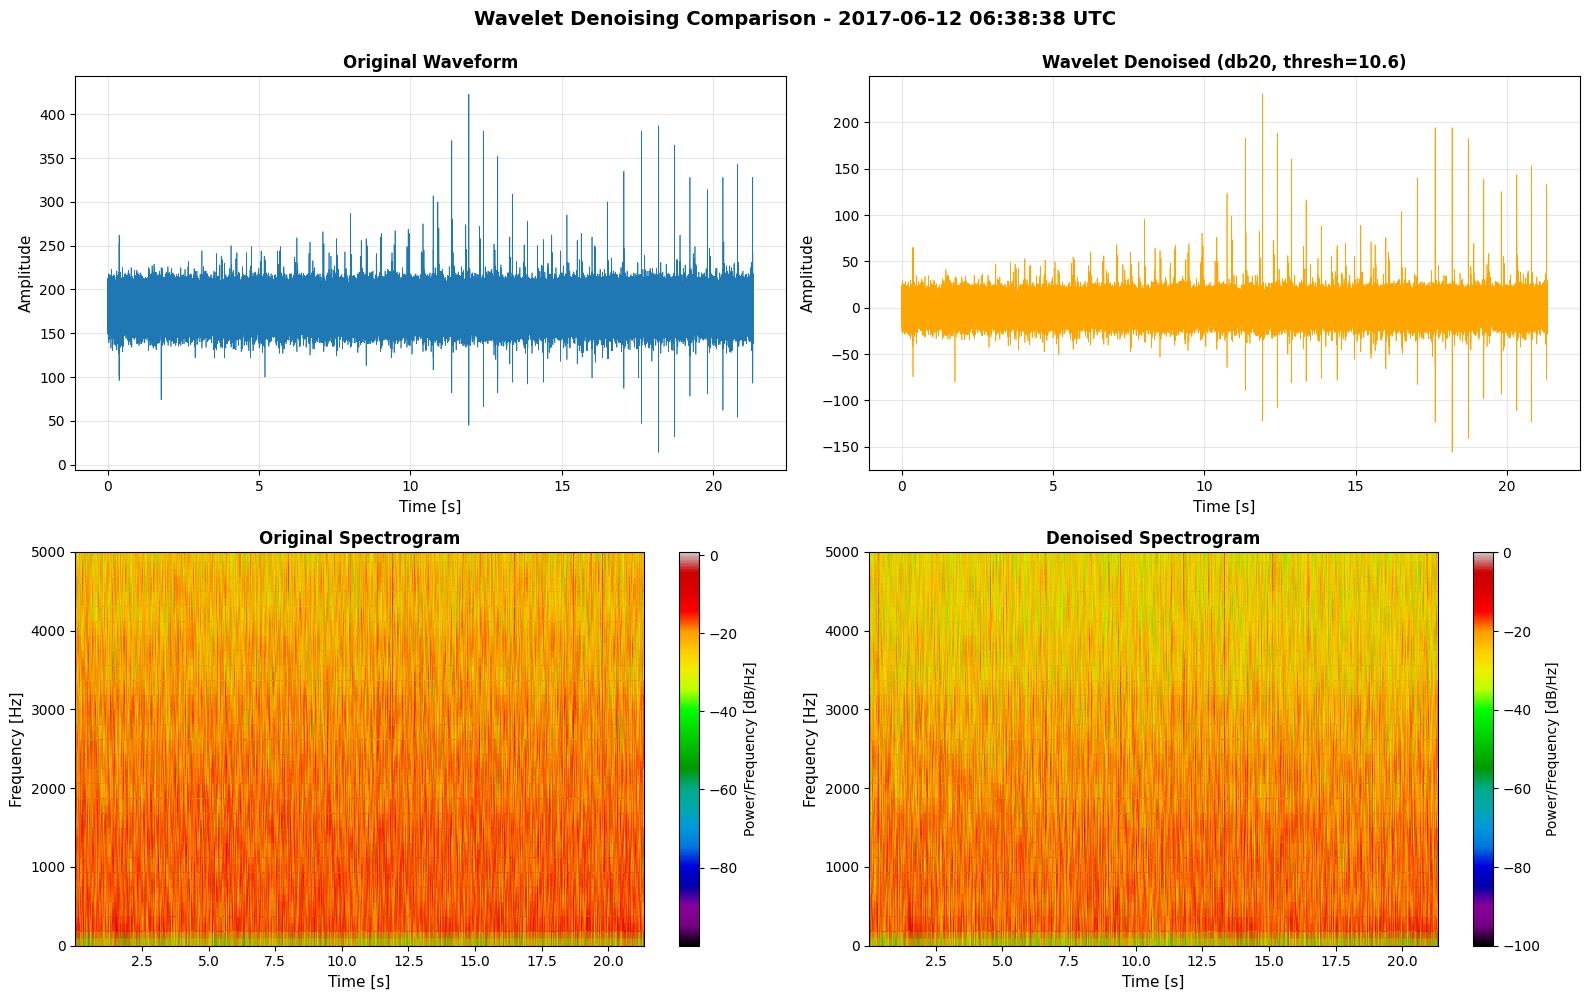

In [4]:
# Create comprehensive comparison plot
ears_reader.plot_denoising_comparison(data, fmax=5000)

## Example 3: Zoomed View

In [ ]:
# Zoom into a specific time window to see details
ears_reader.plot_denoising_comparison(data, xlim=(5, 10), fmax=5000)

## Example 4: Comparing Different Wavelets

Different wavelet families have different characteristics:
- **db4, db8, db20**: Daubechies wavelets (increasing smoothness)
- **sym8**: Symlets (more symmetric than Daubechies)
- **coif5**: Coiflets (symmetric with vanishing moments)

In [ ]:
# Compare different wavelet types
ears_reader.plot_wavelet_comparison(
    data, 
    wavelets=['db4', 'db8', 'db20', 'sym8'],
    xlim=(8, 13)
)

## Example 5: Hard vs Soft Thresholding

In [ ]:
import matplotlib.pyplot as plt

# Apply both hard and soft thresholding
soft_denoised = ears_reader.wavelet_denoise(acoustic_data, hard_threshold=False)
hard_denoised = ears_reader.wavelet_denoise(acoustic_data, hard_threshold=True)

# Create time array
time = np.linspace(0, data['duration'], len(acoustic_data))

# Plot comparison
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

xlim = (8, 12)

axes[0].plot(time, acoustic_data, linewidth=0.5, color='steelblue')
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Original Data', fontsize=12, fontweight='bold')
axes[0].set_xlim(xlim)
axes[0].grid(True, alpha=0.3)

axes[1].plot(time, soft_denoised, linewidth=0.5, color='orange')
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].set_title('Soft Thresholding (default)', fontsize=12, fontweight='bold')
axes[1].set_xlim(xlim)
axes[1].grid(True, alpha=0.3)

axes[2].plot(time, hard_denoised, linewidth=0.5, color='green')
axes[2].set_xlabel('Time [s]', fontsize=12)
axes[2].set_ylabel('Amplitude', fontsize=11)
axes[2].set_title('Hard Thresholding', fontsize=12, fontweight='bold')
axes[2].set_xlim(xlim)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Soft thresholding: Shrinks coefficients towards zero (smoother results)")
print("Hard thresholding: Keeps or zeros coefficients (preserves more details)")

## Example 6: Custom Threshold

You can override the automatic threshold for more aggressive or conservative denoising.

In [ ]:
# Calculate automatic threshold first
_, auto_thresh = ears_reader.wavelet_denoise(acoustic_data, return_threshold=True)

# Try different thresholds
conservative = ears_reader.wavelet_denoise(acoustic_data, thresh=auto_thresh * 0.5)
standard = ears_reader.wavelet_denoise(acoustic_data, thresh=auto_thresh)
aggressive = ears_reader.wavelet_denoise(acoustic_data, thresh=auto_thresh * 2)

# Plot comparison
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

xlim = (5, 10)
time = np.linspace(0, data['duration'], len(acoustic_data))

axes[0].plot(time, acoustic_data, linewidth=0.5, color='steelblue')
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Original', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(time, conservative, linewidth=0.5, color='lightcoral')
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].set_title(f'Conservative (thresh = {auto_thresh*0.5:.1f})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

axes[2].plot(time, standard, linewidth=0.5, color='orange')
axes[2].set_ylabel('Amplitude', fontsize=11)
axes[2].set_title(f'Standard (thresh = {auto_thresh:.1f})', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

axes[3].plot(time, aggressive, linewidth=0.5, color='green')
axes[3].set_xlabel('Time [s]', fontsize=12)
axes[3].set_ylabel('Amplitude', fontsize=11)
axes[3].set_title(f'Aggressive (thresh = {auto_thresh*2:.1f})', fontsize=12, fontweight='bold')
axes[3].grid(True, alpha=0.3)

axes[0].set_xlim(xlim)

plt.tight_layout()
plt.show()

## Example 7: Analyzing a Different File

In [ ]:
# Load the .130 file which may have different characteristics
file_path_2 = Path('fourier_examples/data/7164403B.130')
data_2 = ears_reader.read_ears_file(file_path_2)

ears_reader.print_file_info(data_2, file_path_2)

In [ ]:
# Apply wavelet denoising and compare
ears_reader.plot_denoising_comparison(data_2, xlim=(6, 8), fmax=10000)

## Example 8: Statistical Analysis of Denoising

In [ ]:
# Analyze the effect of denoising on signal statistics
original = data['data']
denoised = ears_reader.wavelet_denoise(original)

print("Statistical Comparison:")
print("=" * 60)
print(f"{'Metric':<30} {'Original':>12} {'Denoised':>12}")
print("=" * 60)
print(f"{'Mean':<30} {np.mean(original):>12.2f} {np.mean(denoised):>12.2f}")
print(f"{'Std Deviation':<30} {np.std(original):>12.2f} {np.std(denoised):>12.2f}")
print(f"{'RMS':<30} {np.sqrt(np.mean(original**2)):>12.2f} {np.sqrt(np.mean(denoised**2)):>12.2f}")
print(f"{'Peak Amplitude':<30} {np.max(np.abs(original)):>12.2f} {np.max(np.abs(denoised)):>12.2f}")
print(f"{'Variance':<30} {np.var(original):>12.2f} {np.var(denoised):>12.2f}")
print("=" * 60)

# Calculate SNR improvement (simplified estimate)
noise_estimate = original - denoised
snr_improvement = 10 * np.log10(np.var(original) / np.var(noise_estimate))
print(f"\nEstimated SNR improvement: {snr_improvement:.2f} dB")

## Example 9: Exporting Denoised Data

Once you're satisfied with the denoising, you can export the cleaned data.

In [ ]:
# Create a new data dictionary with denoised data
data_denoised = data.copy()
data_denoised['data'] = ears_reader.wavelet_denoise(data['data'])

# Now you can use all the plotting functions with denoised data
ears_reader.plot_overview(data_denoised, fmax=5000, xlim_zoom=(8, 12))

## Key Takeaways

1. **Wavelet denoising** is effective for removing noise while preserving transient features
2. **Daubechies 20 (db20)** is a good default wavelet for acoustic signals
3. **Soft thresholding** produces smoother results; **hard thresholding** preserves more detail
4. The **automatic threshold** (VisuShrink) works well in most cases
5. Always **visualize** the results to ensure important features are preserved

## References

- Donoho, D. L., & Johnstone, I. M. (1994). Ideal spatial adaptation by wavelet shrinkage. *Biometrika*, 81(3), 425-455.
- Mallat, S. (2008). *A Wavelet Tour of Signal Processing*. Academic Press.
- PyWavelets Documentation: https://pywavelets.readthedocs.io/